# Classification

Unlike regression where you predict a continuous number, you use classification to predict a category. There is a wide variety of classification applications from medicine to marketing.<br>
Classification models include linear models like Logistic Regression, SVM, and nonlinear ones like K-NN, Kernel SVM and Random Forests.<br><br>
<font color=#C71585>
<b>Models:</b><br>
- Logistic Regression
- K-Nearest Neighbors (K-NN)
- Support Vector Machine (SVM)
    - Kernel SVM
- Naive Bayes
- Decision Tree Classification
- Random Forest Classification
<br>

<b>Classification Model Evaluation:</b>
- Confusion Matrix
- Accuracy Score
</font>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df = pd.read_csv("./Data/Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [45]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

**Feature Scaling**

In [47]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

**Model Training and prediction**
<pre>
LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
</pre>

In [48]:
lgr_model = LogisticRegression(random_state = 0)
lgr_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
print(lgr_model.predict(std.transform([[30,87000]])))
print(lgr_model.predict_proba(std.transform([[30,87000]])))
print(lgr_model.predict_log_proba(std.transform([[30,87000]])))

[0]
[[0.87397564 0.12602436]]
[[-0.13470278 -2.07128002]]


In [50]:
y_pred = lgr_model.predict(X_test_scaled)

In [51]:
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]]


**Confusion Matrix**

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test, y_pred)

array([[57,  1],
       [ 5, 17]], dtype=int64)

**Accuracy Score**

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test, y_pred)

0.925

In [56]:
accuracy_score(y_test, y_pred, normalize = False)
# This no. records out of the total test set were correctly classified.

74

**Classification Report**

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


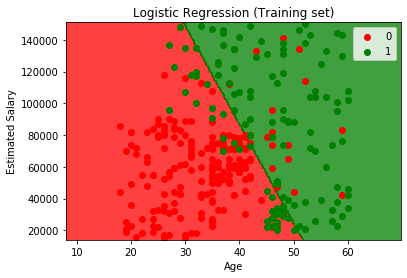

In [109]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = std.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lgr_model.predict(std.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


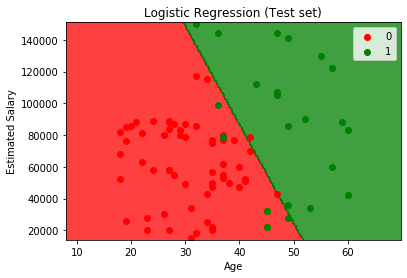

In [110]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = std.inverse_transform(X_test_scaled), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lgr_model.predict(std.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# K-Nearest Neighbors (K-NN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

**Feature Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train,)
X_test_scaled = std_scaler.transform(X_test)

**Model Training and prediction**
<pre>
KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
</pre>

In [22]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

In [23]:
print(knn_model.predict(std_scaler.transform([[30,87000]])))

[0]


**Confusion Matrix**

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test,y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)

**Accuracy Score**

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.95

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


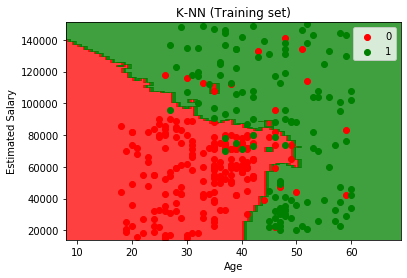

In [29]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


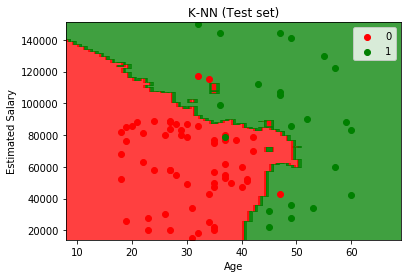

In [30]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_test_scaled), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC

**Feature Scaling**

In [32]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

**Model Training and prediction**
<pre>
SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
</pre

In [37]:
svc_model = SVC(kernel = 'linear', random_state = 0)
svc_model.fit(X_train_scaled, y_train)
y_pred = svc_model.predict(X_test_scaled)

In [40]:
print(svc_model.predict(std_scaler.transform([[30,87000]])))

[0]


**Confusion Matrix**

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, y_pred)

array([[57,  1],
       [ 6, 16]], dtype=int64)

**Accuracy Score**

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test, y_pred)

0.9125

<font color=red><b>NOTE: Since in this case study, data is not easily linearly separable, accuracy of SVM with linear kernel is lower that that of K-NN, which performs non-linear classification.</b></font>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


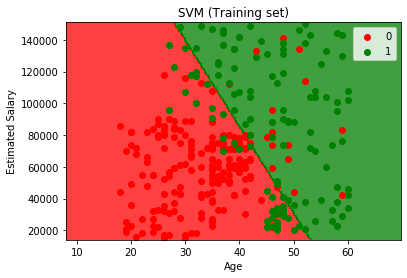

In [47]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svc_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


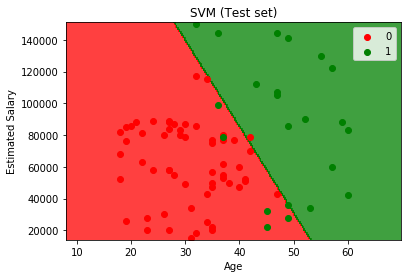

In [48]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_test_scaled), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svc_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Kernel SVM

In [50]:
svc_rbf_model = SVC(kernel = 'rbf', random_state = 0)

In [51]:
svc_rbf_model.fit(X_train_scaled, y_train)
y_pred = svc_rbf_model.predict(X_test_scaled)

In [52]:
print(svc_rbf_model.predict(std_scaler.transform([[30,87000]])))

[0]


In [53]:
confusion_matrix(y_test, y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred)

0.95

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


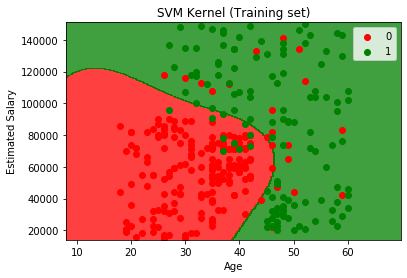

In [55]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svc_rbf_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Kernel (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


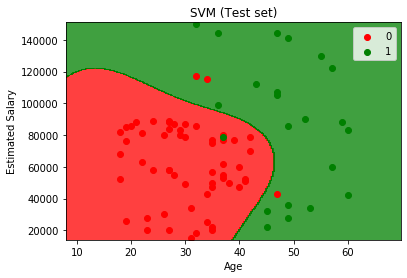

In [56]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_test_scaled), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svc_rbf_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

**Feature Scaling**

In [57]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

**Model Training and prediction**
<pre>
GaussianNB(
    priors=None,
    var_smoothing=1e-09
)
</pre>

In [59]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)

In [62]:
print(nb_model.predict(std_scaler.transform([[30,87000]])))

[0]


**Confusion Matrix & Accuracy Score**

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
confusion_matrix(y_test,y_pred)

array([[55,  3],
       [ 4, 18]], dtype=int64)

In [67]:
accuracy_score(y_test,y_pred)

0.9125

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


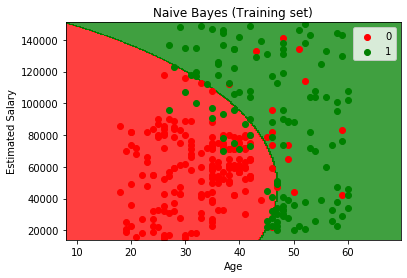

In [69]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, nb_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


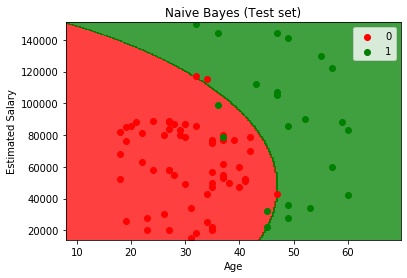

In [70]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_test_scaled), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, nb_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Decision Tree Classification

In [74]:
from sklearn.tree import DecisionTreeClassifier

**Feature Scaling**

In [75]:
from sklearn.preprocessing import StandardScaler

**Model Training and prediction**
<pre>
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
</pre>

In [76]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state = 0)
dt_model.fit(X_train_scaled,y_train)
y_pred = dt_model.predict(X_test_scaled)

In [77]:
print(dt_model.predict(std_scaler.transform([[30,87000]])))

[0]


**Confusion Matrix & Accuracy Score**

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [79]:
confusion_matrix(y_test, y_pred)

array([[53,  5],
       [ 3, 19]], dtype=int64)

In [80]:
accuracy_score(y_test, y_pred)

0.9

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


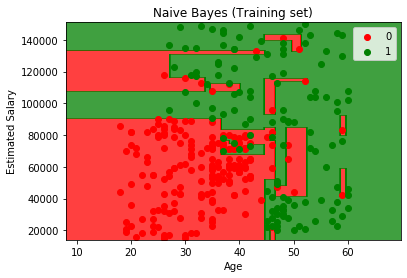

In [81]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, dt_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


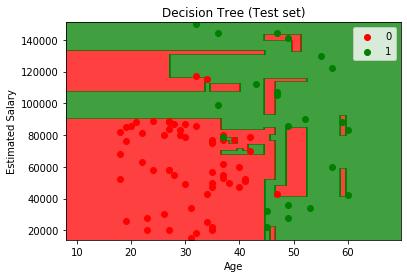

In [82]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_test_scaled), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, dt_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Random Forest Classification

In [14]:
from sklearn.ensemble import RandomForestClassifier

**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

**Model Training and prediction**
<pre>
RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
</pre>

In [18]:
rfc_model = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
rfc_model.fit(X_train_scaled, y_train)
y_pred = rfc_model.predict(X_test_scaled)

In [19]:
print(rfc_model.predict(std_scaler.transform([[30,87000]])))

[0]


**Confusion Matrix & Accuracy Score**

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
confusion_matrix(y_test, y_pred)

array([[54,  4],
       [ 3, 19]], dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)

0.9125

In [26]:
np.arange(5,101,5).reshape(20,1)

array([[  5],
       [ 10],
       [ 15],
       [ 20],
       [ 25],
       [ 30],
       [ 35],
       [ 40],
       [ 45],
       [ 50],
       [ 55],
       [ 60],
       [ 65],
       [ 70],
       [ 75],
       [ 80],
       [ 85],
       [ 90],
       [ 95],
       [100]])

In [32]:
accuracy_scores = {}
for n_estimators in range(5,101,5):
    rfc_model = RandomForestClassifier(n_estimators = n_estimators, criterion='entropy', random_state = 0)
    rfc_model.fit(X_train_scaled, y_train)
    y_pred = rfc_model.predict(X_test_scaled)
    accuracy_scores[n_estimators] = accuracy_score(y_test, y_pred)

In [33]:
accuracy_scores

{5: 0.925,
 10: 0.9125,
 15: 0.9125,
 20: 0.9125,
 25: 0.9125,
 30: 0.925,
 35: 0.925,
 40: 0.925,
 45: 0.9375,
 50: 0.925,
 55: 0.9375,
 60: 0.9375,
 65: 0.9375,
 70: 0.9375,
 75: 0.9375,
 80: 0.9375,
 85: 0.9375,
 90: 0.9375,
 95: 0.9375,
 100: 0.9375}

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, rfc_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = std_scaler.inverse_transform(X_test_scaled), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, rfc_model.predict(std_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()